In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as
import gc

In [2]:
df_train_identity = pd.read_csv('data/ieee-fraud-detection/train_identity.csv')
df_train_transaction = pd.read_csv('data/ieee-fraud-detection/train_transaction.csv')

df_test_identity = pd.read_csv('data/ieee-fraud-detection/test_identity.csv')
df_test_transaction = pd.read_csv('data/ieee-fraud-detection/test_transaction.csv')

In [4]:
df_train_identity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
TransactionID    144233 non-null int64
id_01            144233 non-null float64
id_02            140872 non-null float64
id_03            66324 non-null float64
id_04            66324 non-null float64
id_05            136865 non-null float64
id_06            136865 non-null float64
id_07            5155 non-null float64
id_08            5155 non-null float64
id_09            74926 non-null float64
id_10            74926 non-null float64
id_11            140978 non-null float64
id_12            144233 non-null object
id_13            127320 non-null float64
id_14            80044 non-null float64
id_15            140985 non-null object
id_16            129340 non-null object
id_17            139369 non-null float64
id_18            45113 non-null float64
id_19            139318 non-null float64
id_20            139261 non-null float64
id_21            5159 non-null float64
id_2

In [5]:
df_train_identity.head(3)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows


In [9]:
df_train_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [8]:
df_train_transaction.head(3)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_train = pd.merge(df_train_transaction, df_train_identity, on=['TransactionID'], how='left')
df_test = pd.merge(df_test_transaction, df_test_identity, on=['TransactionID'], how='left')

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB


In [25]:
def fileter_numeric_cols(data):

    numeric_cols = set()
    numric_cols_cnt = 0

    for col in data.columns:
        col_type = str(data[col].dtypes)
        #print(col_type, type(col_type))
        if col_type[:3] == 'int' or col_type[:5] == 'float' or col_type[:6] == 'double':
            numeric_cols.add(col_type)
            numric_cols_cnt  += 1

    return list(numeric_cols), numric_cols_cnt, numric_cols_cnt/len(data.columns)

train_num_cols, train_numric_cols_cnt, train_numric_cols_rate = fileter_numeric_cols(df_train)

print("数字相关的列有{0}个，类型为{1}个，占比{2}\n{3}".format(train_numric_cols_cnt, len(train_num_cols), \
                                              train_numric_cols_rate, train_num_cols))

数字相关的列有403个，类型为2个，占比0.9285714285714286
['float64', 'int64']


In [28]:
df_train[['id_01', 'id_02']].describe()

,id_01,id_02
count,144233.000000,140872.000000
mean,-10.170502,174716.584708
std,14.347949,159651.816856
min,-100.000000,1.000000
25%,-10.000000,67992.000000
50%,-5.000000,125800.500000
75%,-5.000000,228749.000000
max,0.000000,999595.000000


None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


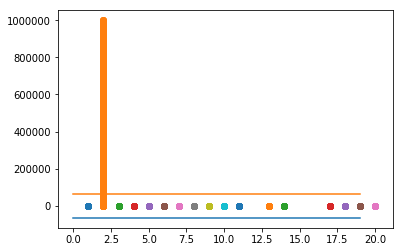

In [50]:
def plot_id_distribution(data, id_rg, new_rg):
    
    id_rg = min(id_rg, 38)
    
    for i in range(id_rg):
        cols = str(i+1) if i >= 9 else '0'+str(i+1)
        
        if str(df_train['id_%s' % cols].dtypes) == 'object':
            continue
        
        plt.scatter([i+1] * df_train.shape[0], df_train['id_%s' % cols])
        
        np_info = np.info(df_train['id_%s' % cols].dtypes)
        #print(df_train['id_%s' % cols].dtypes)
        #plt.scatter([i+1] * 2, [np_info.min(), np_info.max()])
    
    np_info = np.finfo(new_rg)
    plt.plot(list(range(id_rg+1)), [np_info.min]*id_rg, [np_info.max]*id_rg)
    
    
plot_id_distribution(df_train, 20, np.float16)

In [51]:
train_num_cols

['float64', 'int64']

In [53]:
def reduce_mem_usage(df, numerics, verbose=True):
    #numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: 
        print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, \
                                                                    100 * (start_mem - end_mem) / start_mem))
    return df

df_train = reduce_mem_usage(df_train, train_num_cols)
df_test = reduce_mem_usage(df_test, train_num_cols)

Mem. usage decreased to 650.48 Mb (66.8% reduction)
Mem. usage decreased to 565.37 Mb (66.3% reduction)


In [54]:
del df_train_transaction, df_train_identity, df_test_transaction, df_test_identity

gc.collect()

In [55]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float16(354), float32(45), int16(1), int32(2), int8(1), object(31)
memory usage: 650.5+ MB


In [271]:
data_null = df_train.isnull().sum()
data_null = data_null.drop(data_null[data_null == 0].index).sort_values(ascending=False)

data_null = data_null / df_train.shape[0] * 100

print("非空列有{0}个 空列占比{1}%".format(df_train.shape[1] - len(data_null), len(data_null) / df_train.shape[1] * 100))

非空列有214个 空列占比5.3097345132743365%


null rate >= 75.0 的列有208个，占比总null列50.24155%


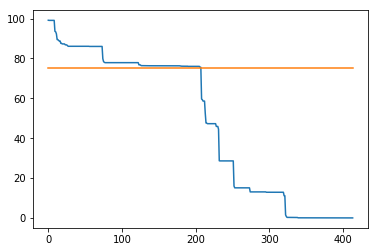

In [81]:
null_rate = 0.75 * 100

plt.plot(np.arange(data_null.shape[0]), data_null)
plt.plot(np.arange(data_null.shape[0]), np.array([null_rate] * data_null.shape[0]))

print("null rate >= {0} 的列有{1}个，占比总null列{2:.5f}%".format(null_rate, np.sum(data_null > null_rate), \
                                                     np.sum(data_null > null_rate) / data_null.shape[0]  * 100 ))

In [272]:
data_null

M5               59.349409
M7               58.635317
M9               58.633115
M8               58.633115
M4               47.658753
M3               45.907136
M2               45.907136
M1               45.907136
M6               28.678836
P_emaildomain    15.994852
card4             0.267044
card6             0.266028
dtype: float64

In [82]:
data_null[data_null > null_rate].index

Index(['id_24', 'id_25', 'id_07', 'id_08', 'id_21', 'id_26', 'id_22', 'id_23',
       'id_27', 'dist2',
       ...
       'V250', 'V221', 'V251', 'V255', 'V272', 'V256', 'V259', 'V220', 'id_12',
       'id_01'],
      dtype='object', length=208)

In [85]:
df_train.shape, df_test.shape

((590540, 434), (506691, 433))

In [88]:
df_train = df_train.drop(data_null[data_null > null_rate].index, axis=1)
df_test = df_test.drop(data_null[data_null > null_rate].index, axis=1)


In [89]:
df_train.shape, df_test.shape

((590540, 226), (506691, 225))

In [102]:
def fill_numbers(props):
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")

    for col in props.columns:
        if props[col].dtype != object:  # Exclude strings
            
            # Print current column type
            print("******************************")
            print("Column: ",col)
            #print("dtype before: ",props[col].dtype)
            
            # make variables for Int, max and min
            IsInt = False
            mn = props[col].min()
            
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(props[col]).all():  # case if row has NA value, then return False, also inverse returns True.
                props[col].fillna(mn-1,inplace=True)  

    
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props

df_train = fill_numbers(df_train)
df_test = fill_numbers(df_test)

Memory usage of properties dataframe is : 344.95649337768555  MB
******************************
Column:  TransactionID
dtype before:  int32
dtype after:  int32
******************************
******************************
Column:  isFraud
dtype before:  int8
dtype after:  int8
******************************
******************************
Column:  TransactionDT
dtype before:  int32
dtype after:  int32
******************************
******************************
Column:  TransactionAmt
dtype before:  float16
dtype after:  float16
******************************
******************************
Column:  card1
dtype before:  int16
dtype after:  int16
******************************
******************************
Column:  card2
dtype before:  float16
dtype after:  float16
******************************
******************************
Column:  card3
dtype before:  float16
dtype after:  float16
******************************
******************************
Column:  card5
dtype before:  float16
dty

dtype after:  float16
******************************
******************************
Column:  V43
dtype before:  float16
dtype after:  float16
******************************
******************************
Column:  V44
dtype before:  float16
dtype after:  float16
******************************
******************************
Column:  V45
dtype before:  float16
dtype after:  float16
******************************
******************************
Column:  V46
dtype before:  float16
dtype after:  float16
******************************
******************************
Column:  V47
dtype before:  float16
dtype after:  float16
******************************
******************************
Column:  V48
dtype before:  float16
dtype after:  float16
******************************
******************************
Column:  V49
dtype before:  float16
dtype after:  float16
******************************
******************************
Column:  V50
dtype before:  float16
dtype after:  float16
******************

dtype after:  float16
******************************
******************************
Column:  V125
dtype before:  float16
dtype after:  float16
******************************
******************************
Column:  V126
dtype before:  float32
dtype after:  float32
******************************
******************************
Column:  V127
dtype before:  float32
dtype after:  float32
******************************
******************************
Column:  V128
dtype before:  float32
dtype after:  float32
******************************
******************************
Column:  V129
dtype before:  float16
dtype after:  float16
******************************
******************************
Column:  V130
dtype before:  float16
dtype after:  float16
******************************
******************************
Column:  V131
dtype before:  float16
dtype after:  float16
******************************
******************************
Column:  V132
dtype before:  float32
dtype after:  float32
**********

dtype after:  float16
******************************
******************************
Column:  C14
dtype before:  float16
dtype after:  float16
******************************
******************************
Column:  D1
dtype before:  float16
dtype after:  float16
******************************
******************************
Column:  D2
dtype before:  float16
dtype after:  float16
******************************
******************************
Column:  D3
dtype before:  float16
dtype after:  float16
******************************
******************************
Column:  D4
dtype before:  float16
dtype after:  float16
******************************
******************************
Column:  D5
dtype before:  float16
dtype after:  float16
******************************
******************************
Column:  D10
dtype before:  float16
dtype after:  float16
******************************
******************************
Column:  D11
dtype before:  float16
dtype after:  float16
***********************

dtype after:  float16
******************************
******************************
Column:  V67
dtype before:  float16
dtype after:  float16
******************************
******************************
Column:  V68
dtype before:  float16
dtype after:  float16
******************************
******************************
Column:  V69
dtype before:  float16
dtype after:  float16
******************************
******************************
Column:  V70
dtype before:  float16
dtype after:  float16
******************************
******************************
Column:  V71
dtype before:  float16
dtype after:  float16
******************************
******************************
Column:  V72
dtype before:  float16
dtype after:  float16
******************************
******************************
Column:  V73
dtype before:  float16
dtype after:  float16
******************************
******************************
Column:  V74
dtype before:  float16
dtype after:  float16
******************

dtype after:  float16
******************************
******************************
Column:  V283
dtype before:  float16
dtype after:  float16
******************************
******************************
Column:  V284
dtype before:  float16
dtype after:  float16
******************************
******************************
Column:  V285
dtype before:  float16
dtype after:  float16
******************************
******************************
Column:  V286
dtype before:  float16
dtype after:  float16
******************************
******************************
Column:  V287
dtype before:  float16
dtype after:  float16
******************************
******************************
Column:  V288
dtype before:  float16
dtype after:  float16
******************************
******************************
Column:  V289
dtype before:  float16
dtype after:  float16
******************************
******************************
Column:  V290
dtype before:  float16
dtype after:  float16
**********

In [96]:
df_train.head(3)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987000,0,86400,68.5,W,13926,99.0,150.0,discover,142.0,...,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
data_null_1 = df_train.isnull().sum()
data_null_1 = data_null_1.drop(data_null_1[data_null_1 == 0].index).sort_values(ascending=False)

data_null_1 = data_null_1 / df_train.shape[0] * 100


In [104]:
data_null_1

M5               59.349409
M7               58.635317
M9               58.633115
M8               58.633115
M4               47.658753
M3               45.907136
M2               45.907136
M1               45.907136
M6               28.678836
P_emaildomain    15.994852
card4             0.267044
card6             0.266028
dtype: float64

In [180]:
#plt.bar(np.arange(df_train['M5'].value_counts(dropna=False).shape[0]), \
#            height=df_train['M5'].value_counts(dropna=False), width=0.3)
def visualize_cols(data, cols, sub_size=(1, 1), figsize=(40, 30)):
    fig = plt.figure(figsize=figsize)
    
    
    for idx, col in enumerate(cols):
        #col = 'M5'
        ax  = fig.add_subplot(sub_size[0], sub_size[1], idx+1)
        
        x_pos = np.arange(data[col].value_counts(dropna=False).shape[0])
        y_pos = data[col].value_counts(dropna=False)

        ax.bar(x=0, bottom=x_pos, height=0.3, width=y_pos, orientation="horizontal", \
                    label=col, tick_label=y_pos.index)
        
        ax.tick_params(labelsize=30) 
        
        for tick in ax.get_yticklabels(): 
            tick.set_rotation(30)
        for tick in ax.get_xticklabels():  
            tick.set_rotation(30)
        
        # 添加图例
        ax.legend(prop={'size':30})

    # 展示图形
    plt.show()
    
    

In [268]:
#是否可以做一个对col、isFraud双类别进行分组，并plot

def visualize_cols_tmp(data, cols, sub_size=(1, 1), figsize=(40, 30)):
    fig = plt.figure(figsize=figsize)
    
    
    for idx, col in enumerate(cols):
        #col = 'M5'
        ax  = fig.add_subplot(sub_size[0], sub_size[1], idx+1)
        
        fraud_cols_grp = df_train[['isFraud', col]].groupby('isFraud')
        print(fraud_cols_grp.size())
        
        x_pos = np.arange(data[col].value_counts(dropna=False).shape[0])
        mb = data[col].value_counts(dropna=False)
        
        y_pos = fraud_cols_grp.get_group(0)[col].value_counts(dropna=False, cols=mb.index)

        ax.bar(x=0, bottom=x_pos, height=0.3, width=y_pos, orientation="horizontal", \
                    label=col+" Fraud-0", tick_label=y_pos.index)
        
        #fraud == 1
        y_pos = fraud_cols_grp.get_group(1)[col].value_counts(dropna=False, cols=mb.index)
        print(y_pos)
        print(x_pos, y_pos.index)
        ax.bar(x=1, bottom=x_pos, height=0.3, width=y_pos+1, orientation="horizontal", \
                    label=col+" Fraud-1", tick_label=y_pos.index)
        
        ax.tick_params(labelsize=30) 
        
        for tick in ax.get_yticklabels(): 
            tick.set_rotation(30)
        for tick in ax.get_xticklabels():  
            tick.set_rotation(30)
        
        # 添加图例
        ax.legend(prop={'size':30})

    # 展示图形
    plt.show()
    
    

isFraud
0    569877
1     20663
dtype: int64


TypeError: value_counts() got an unexpected keyword argument 'cols'

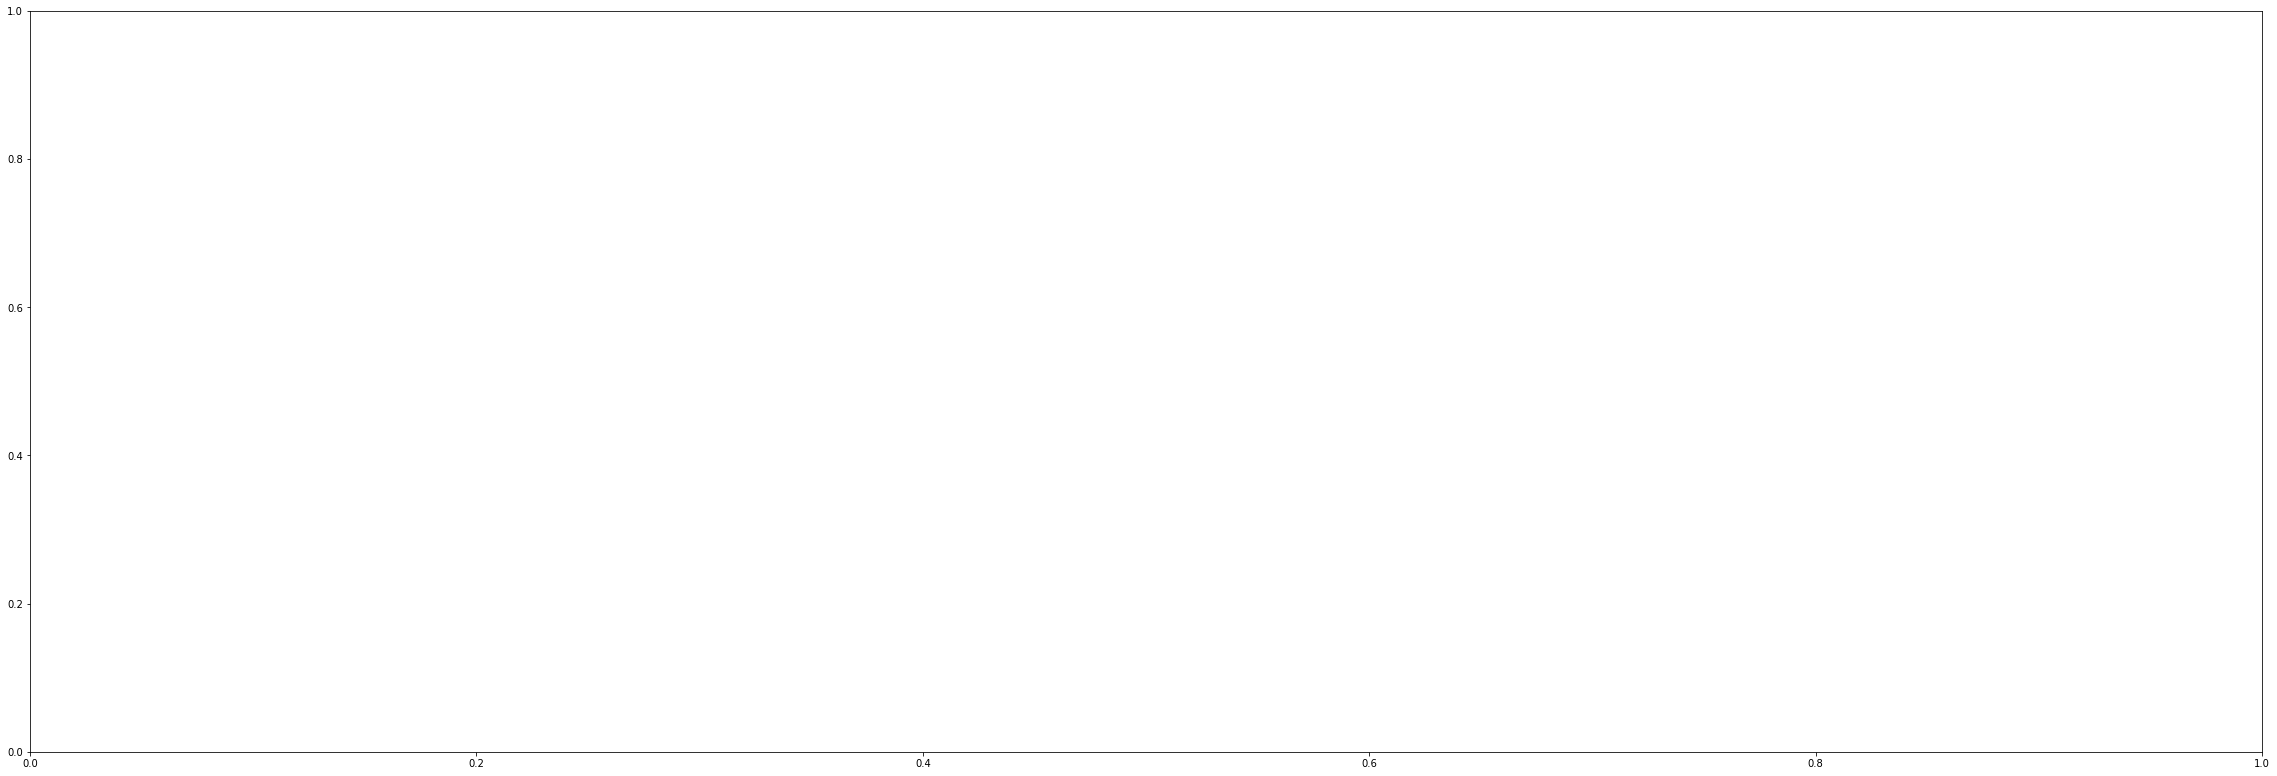

In [269]:
visualize_cols_tmp(df_train, ['card4', 'card6'], (2, 1))

In [250]:
tmp = df_train[['isFraud', 'M4']].groupby('isFraud')

In [253]:
tmp.get_group(0)['M4'].value_counts(dropna=False)

NaN    276217
M0     189207
M2      53056
M1      51397
Name: M4, dtype: int64

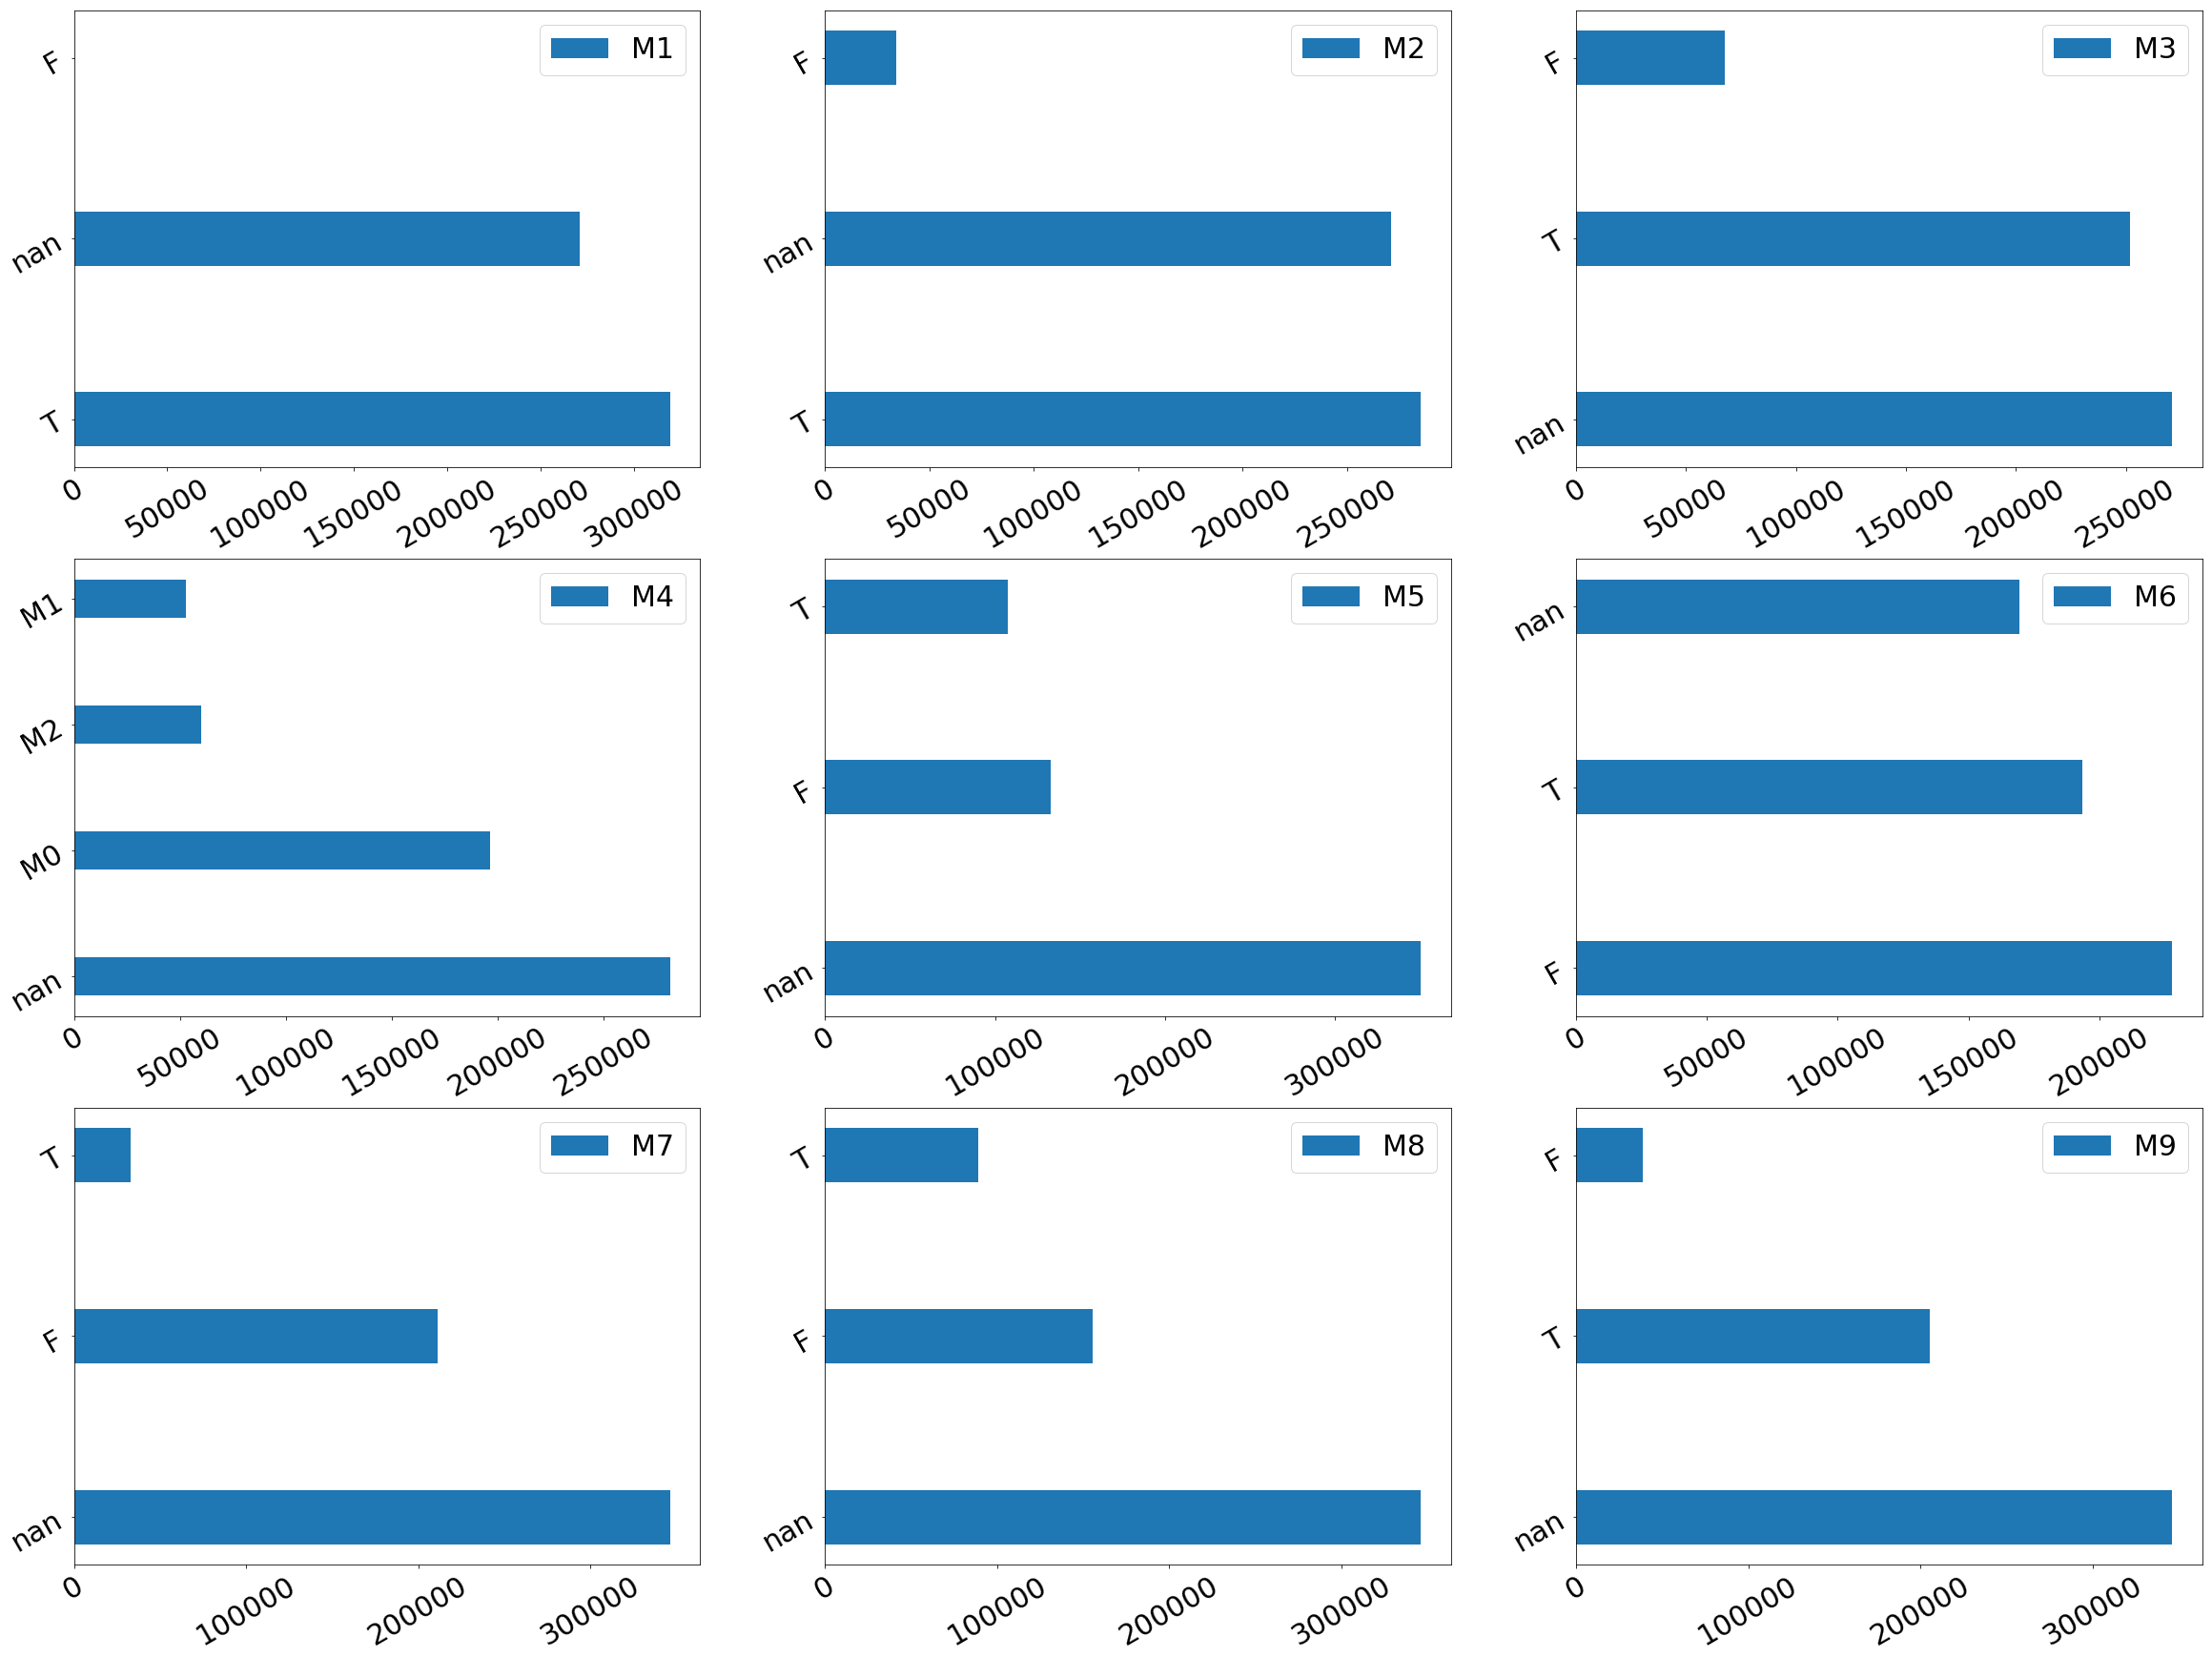

In [179]:
visualize_cols(df_train, ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9'], (3, 3))

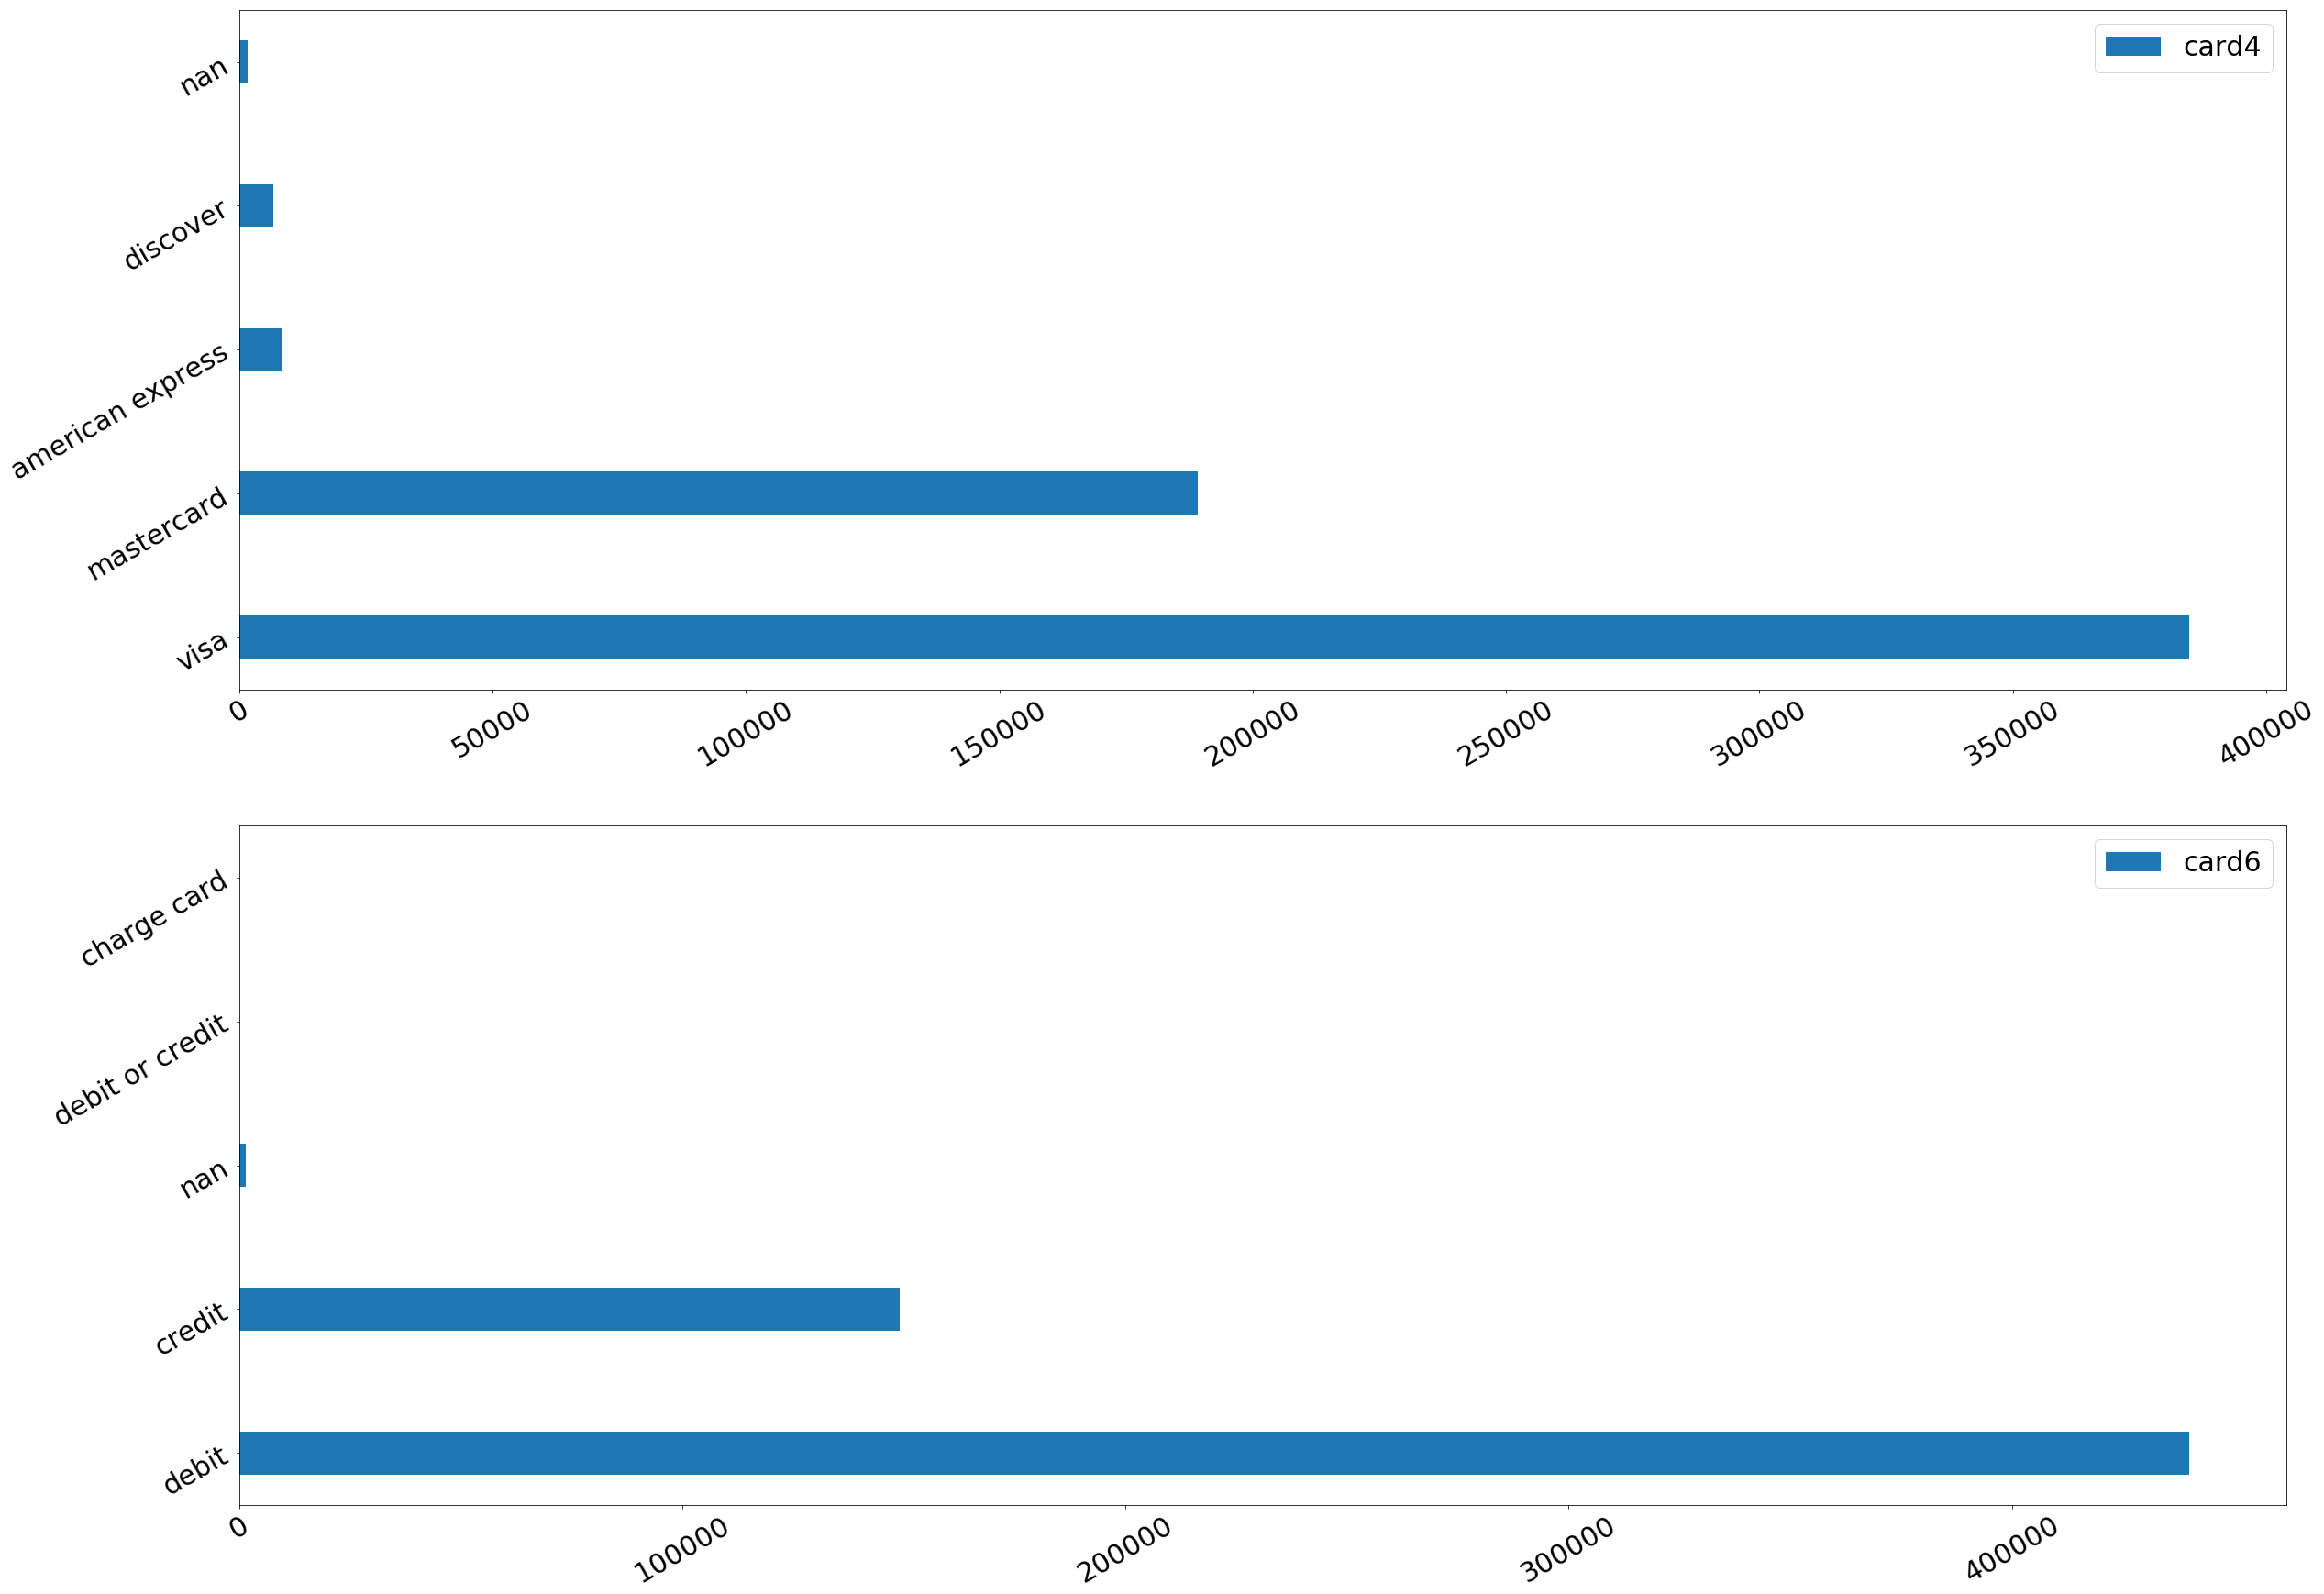

In [178]:
visualize_cols(df_train, ['card4', 'card6'], (2, 1))

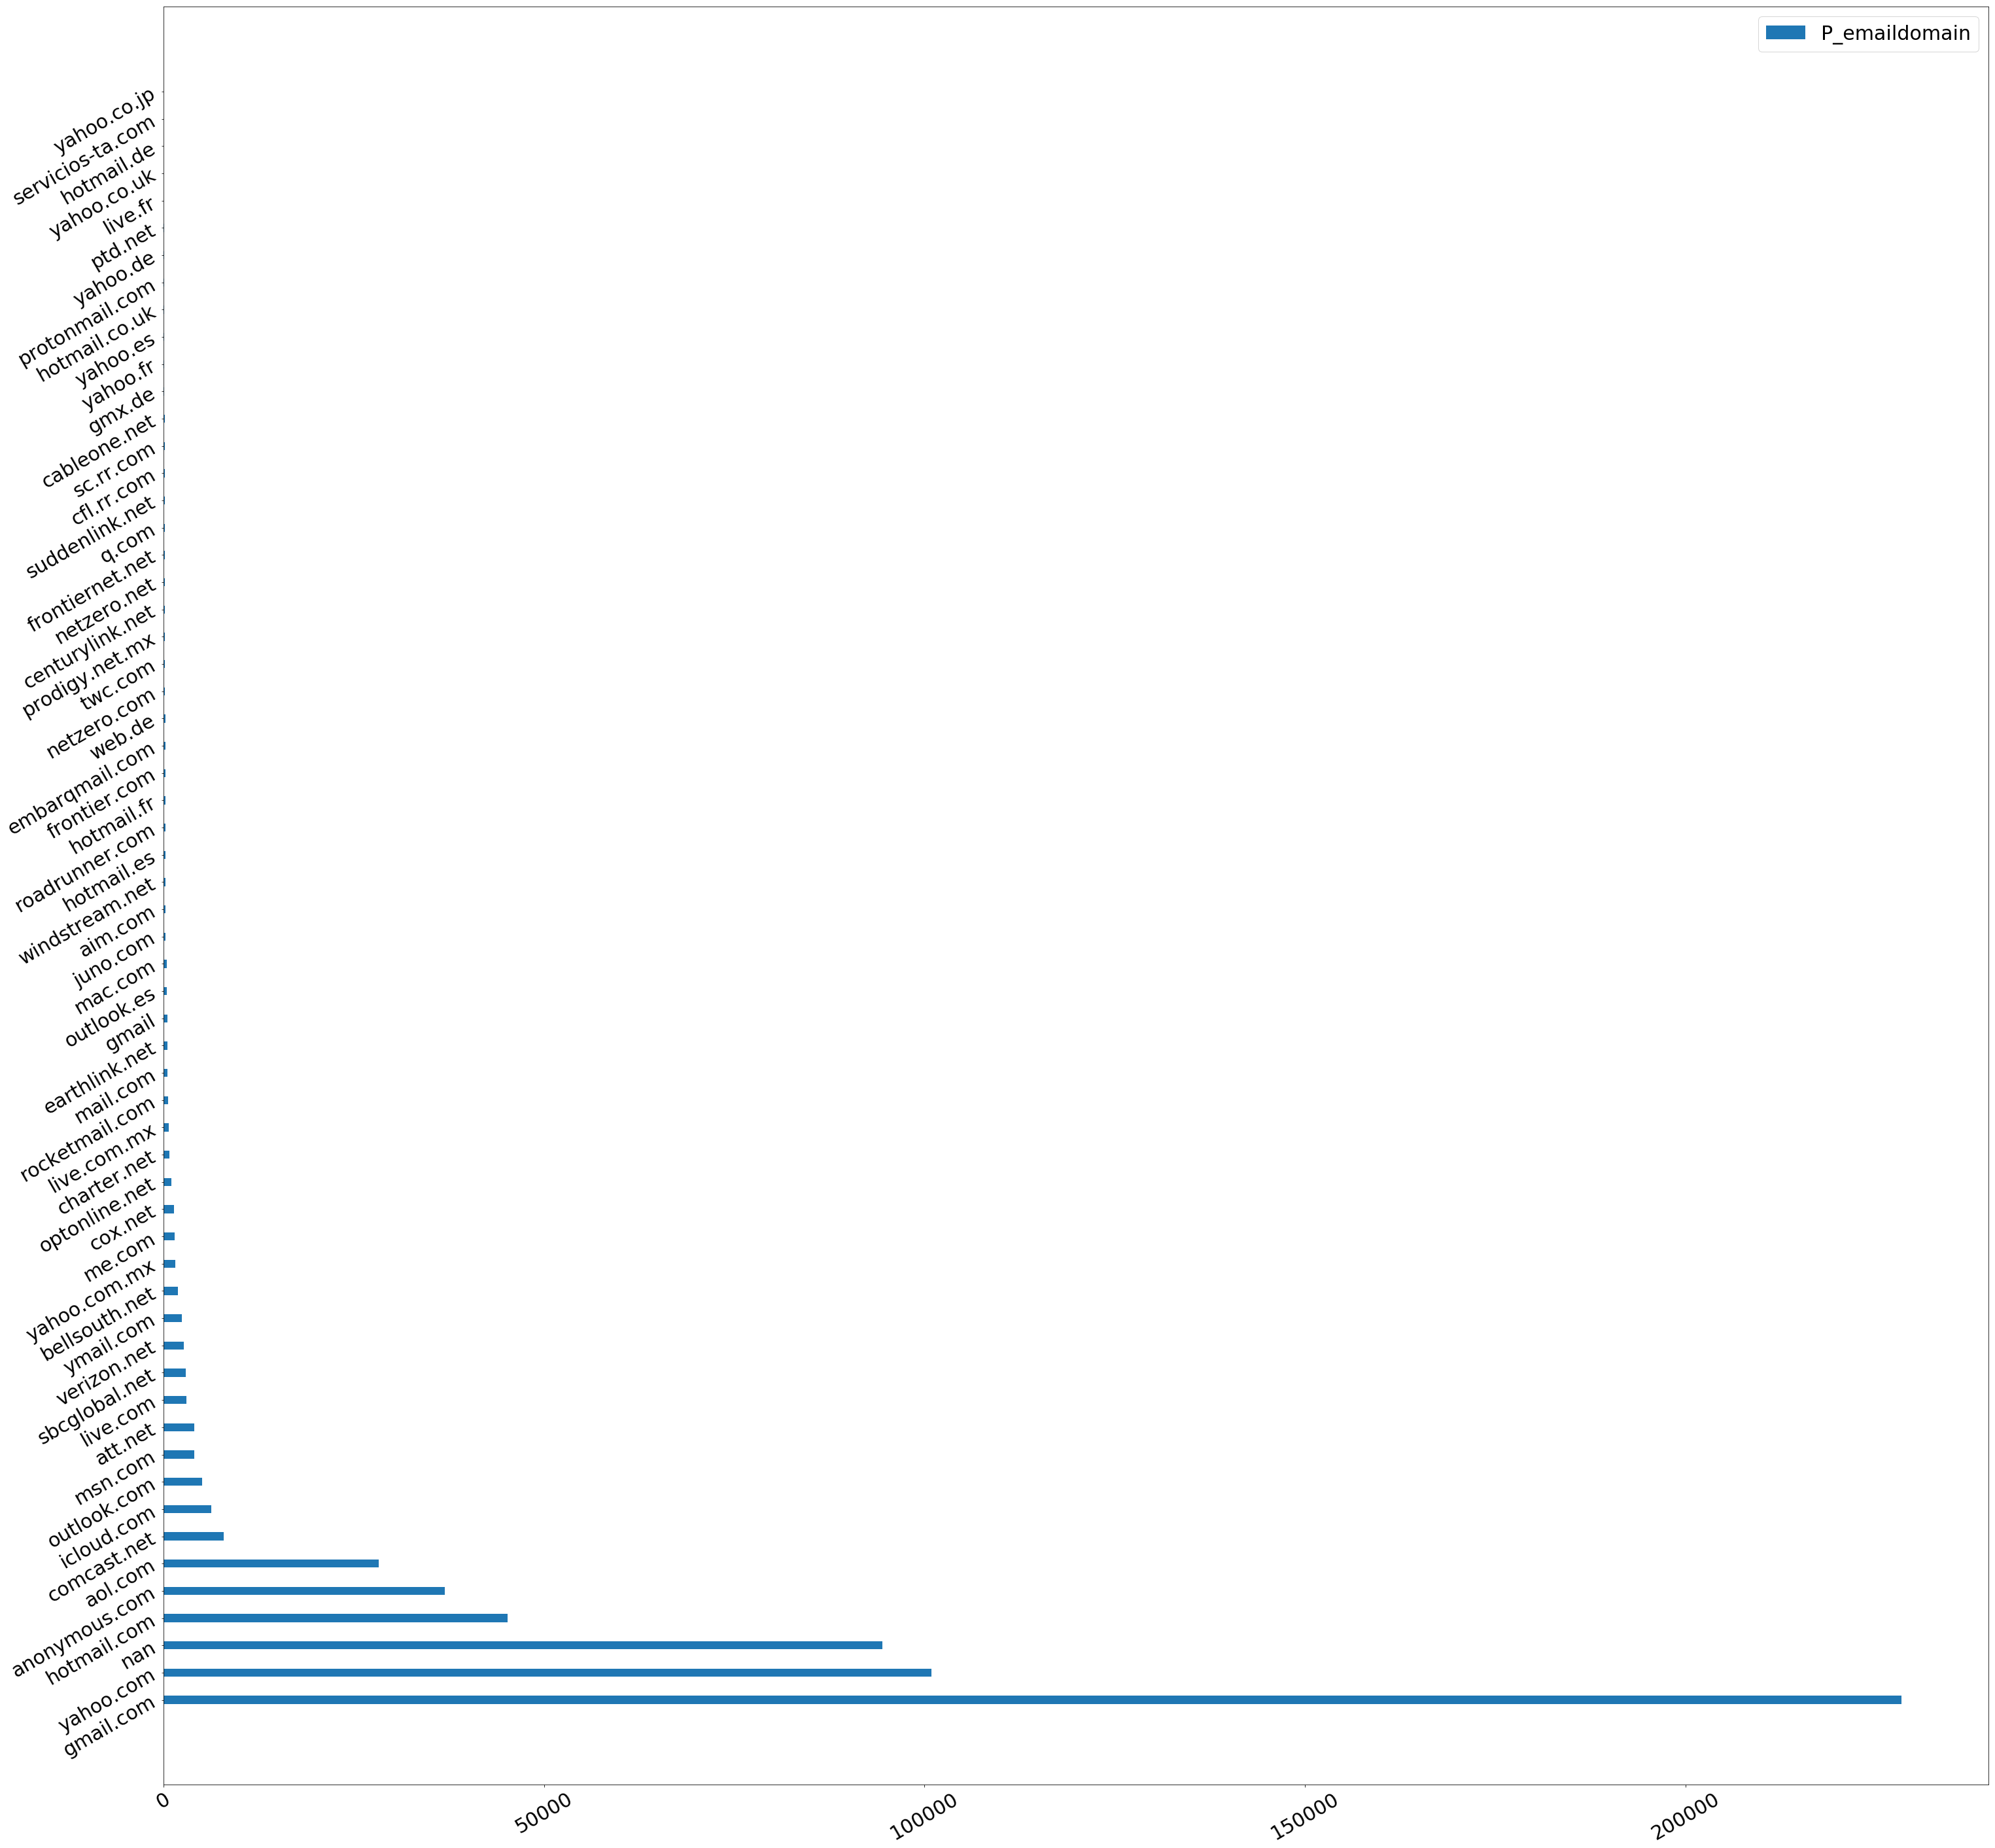

In [181]:
 visualize_cols(df_train, ['P_emaildomain'], figsize=(50, 50))

In [128]:
df_train['M5'].value_counts(dropna=False)

NaN    350482
F      132491
T      107567
Name: M5, dtype: int64

In [316]:
gc.collect()

2872

In [183]:
'''
#. 重定义数值列的类型，可以压缩2/3
#. 空值太多，如何处理
#. 删去了空值占比大于0.75的特征
#. 数值nan = min(当天列)-1
#. 类别型空值直接赋一个other，网上看到可以用ffill和bfill
#. 类别特征dummy，但P_emaildomain特征的取值太多，是否还需要dummy，
    #占比低的是否可以重新划分成一类
'''

'''
#email 保留前几列，后面的和nan一起化一类
    #词向量
#C、D、V类特征按类降维
#编码器？

#DT datetime -> 分 早晚之类的
    #设置slice，统计区间内数量
#Amt 交易额
#identity
'''


3

In [301]:
#应该还可以提高，不然others类别占比比正常值还高
use_top_email = 8

use_top_email_cols = (df_train['P_emaildomain'].value_counts(dropna=False) / \
                      df_train.shape[0] * 100)[:use_top_email]

print('top {0} email domain rank {1} %'.format(use_top_email, use_top_email_cols.sum()))

df_train['P_emaildomain'] = df_train['P_emaildomain'].apply(lambda x: \
                                                        x if x in use_top_email_cols.index else 'others')

top 8 email domain rank 92.87042368002169 %


In [306]:
df_train['P_emaildomain'].value_counts(dropna=False)

gmail.com        228355
yahoo.com        100934
NaN               94456
hotmail.com       45250
others            42103
anonymous.com     36998
aol.com           28289
comcast.net        7888
icloud.com         6267
Name: P_emaildomain, dtype: int64

In [304]:
#d1 = pd.get_dummies(df_train['M1'], dummy_na=True, prefix='M1_')
#except P_emaildomain
#部分列取值范围不一样，甚至test取值比train取值更广，是以train的为准，还是全集为准
def fill_dummy_category(props):
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    print("before, data shape {0}".format(props.shape))
    need_drop = []
    need_add = pd.DataFrame()
    for col in props.columns:
        if props[col].dtype == object:  # Exclude strings
            
            need_drop.append(col)
            
            # Print current column type
            print("******************************")
            print("Column: ",col)
            #print("dtype before: ",props[col].dtype)
            print("取值种类: {0}".format(len(props[col].value_counts(dropna=False).index)))
            
            dummy = pd.get_dummies(props[col], dummy_na=True, prefix='%s_'%col)
            
            need_add = pd.concat((need_add, dummy), axis=1)


    props = props.drop(need_drop, axis=1)
    props = pd.concat((props, need_add), axis=1)
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    print("after, data shape {0}".format(props.shape))
    return props

df_train = fill_dummy_category(df_train)
df_test = fill_dummy_category(df_test)

Memory usage of properties dataframe is : 344.95649337768555  MB
before, data shape (590540, 226)
******************************
Column:  ProductCD
******************************
Column:  card4
******************************
Column:  card6
******************************
Column:  P_emaildomain
******************************
Column:  M1
******************************
Column:  M2
******************************
Column:  M3
******************************
Column:  M4
******************************
Column:  M5
******************************
Column:  M6
******************************
Column:  M7
******************************
Column:  M8
******************************
Column:  M9
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  374.80518341064453  MB
This is  108.65288539452953 % of the initial size
after, data shape (590540, 279)
Memory usage of properties dataframe is : 282.19942474365234  MB
before, data shape (506691, 225)
******************************
Column:  ProductCD
***********

In [307]:
df_train.head(3)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,M6__nan,M7__F,M7__T,M7__nan,M8__F,M8__T,M8__nan,M9__F,M9__T,M9__nan
0,2987000,0,86400,68.5,W,13926,99.0,150.0,discover,142.0,...,0,0,0,1,0,0,1,0,0,1
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,0,0,0,1,0,0,1,0,0,1
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,0,1,0,0,1,0,0,1,0,0


In [308]:
df_train.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,M6__nan,M7__F,M7__T,M7__nan,M8__F,M8__T,M8__nan,M9__F,M9__T,M9__nan
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,590540.0,590540.0,590540.0,590540.0,590540.0,...,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000
mean,3.282270e+06,0.034990,7.372311e+06,NaN,9898.734658,NaN,NaN,NaN,NaN,NaN,...,0.286788,0.357933,0.055713,0.586353,0.262897,0.150772,0.586331,0.065418,0.348251,0.586331
std,1.704744e+05,0.183755,4.617224e+06,NaN,4901.170153,NaN,0.0,0.0,NaN,0.0,...,0.452262,0.479393,0.229368,0.492487,0.440207,0.357827,0.492491,0.247262,0.476416,0.492491
min,2.987000e+06,0.000000,8.640000e+04,0.250977,1000.000000,99.0,99.0,99.0,99.0,9.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.312500,6019.000000,204.0,150.0,166.0,184.0,87.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.750000,9678.000000,360.0,150.0,226.0,272.0,87.0,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.0,150.0,226.0,327.0,87.0,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,3.577539e+06,1.000000,1.581113e+07,31936.000000,18396.000000,600.0,231.0,237.0,540.0,102.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [309]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 279 entries, TransactionID to M9__nan
dtypes: float16(191), float32(18), int16(1), int32(2), int8(1), object(13), uint8(53)
memory usage: 374.8+ MB


In [312]:
list(filter(lambda x:x[:13] == 'P_emaildomain', df_train.columns))

['P_emaildomain',
 'P_emaildomain__anonymous.com',
 'P_emaildomain__aol.com',
 'P_emaildomain__comcast.net',
 'P_emaildomain__gmail.com',
 'P_emaildomain__hotmail.com',
 'P_emaildomain__icloud.com',
 'P_emaildomain__others',
 'P_emaildomain__yahoo.com',
 'P_emaildomain__nan']

In [315]:
df_train.isnull().sum(), df_test.isnull().sum()

(TransactionID                   0
 isFraud                         0
 TransactionDT                   0
 TransactionAmt                  0
 ProductCD                       0
 card1                           0
 card2                           0
 card3                           0
 card4                        1577
 card5                           0
 card6                        1571
 addr1                           0
 addr2                           0
 dist1                           0
 P_emaildomain               94456
 C1                              0
 C2                              0
 C3                              0
 C4                              0
 C5                              0
 C6                              0
 C7                              0
 C8                              0
 C9                              0
 C10                             0
 C11                             0
 C12                             0
 C13                             0
 C14                